In [2]:
# Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [3]:
# File paths
weather_2019 = "add_weather_dataset"

In [4]:
# Load preprocess datasets
weather_2019 = pd.read_csv(weather_2019, header = 0, sep = ';')

In [5]:
# Remove columns
weather_2019 = weather_2019.drop(columns=['PROVINCIA', 'MUNICIPIO'])

# Rename columns
weather_2019.rename(columns={'ESTACION': 'id_weather','ANO': 'year', 'MES': 'month', 'DAY': 'day'}, inplace=True)

display(weather_2019.head())

,id_weather,year,month,day,80,81,82,83,86,87,88,89
0,24,2019,1,1,6.0,0.69,22.0,4.4,67.0,957.0,101.0,0.0
1,24,2019,1,2,6.0,0.66,331.0,4.0,69.0,955.0,99.0,0.0
2,24,2019,1,3,6.0,0.71,115.0,4.4,63.0,954.0,103.0,0.0
3,24,2019,1,4,5.0,0.68,54.0,3.7,69.0,956.0,102.0,0.0
4,24,2019,1,5,6.0,0.83,223.0,3.0,71.0,959.0,107.0,0.0


In [6]:
weather_viz_df = weather_2019.copy()

# Add date column for viz:
weather_viz_df['date'] = weather_viz_df['day'].astype(str).str.cat(weather_viz_df['month'].astype(str), sep='-').str.cat(weather_viz_df['year'].astype(str), sep='-')
weather_viz_df['Numb. days in Year since Jan 1st'] = weather_viz_df.index + 1


# Select magnitudes to be plotted
weather_viz_df = weather_viz_df[['Numb. days in Year since Jan 1st',  '81', '82', '83', '86', '87', '88', '89']]


display(weather_viz_df)


,Numb. days in Year since Jan 1st,81,82,83,86,87,88,89
0,1,0.69,22.0,4.4,67.0,957.0,101.0,0.0
1,2,0.66,331.0,4.0,69.0,955.0,99.0,0.0
2,3,0.71,115.0,4.4,63.0,954.0,103.0,0.0
3,4,0.68,54.0,3.7,69.0,956.0,102.0,0.0
4,5,0.83,223.0,3.0,71.0,959.0,107.0,0.0
...,...,...,...,...,...,...,...,...
360,361,0.59,20.0,6.8,72.0,953.0,95.0,0.0
361,362,0.67,344.0,5.8,68.0,953.0,98.0,0.4
362,363,0.64,13.0,5.7,71.0,954.0,98.0,0.0
363,364,0.66,125.0,4.9,79.0,955.0,95.0,0.0


In [7]:
display(weather_viz_df.shape)

(365, 8)

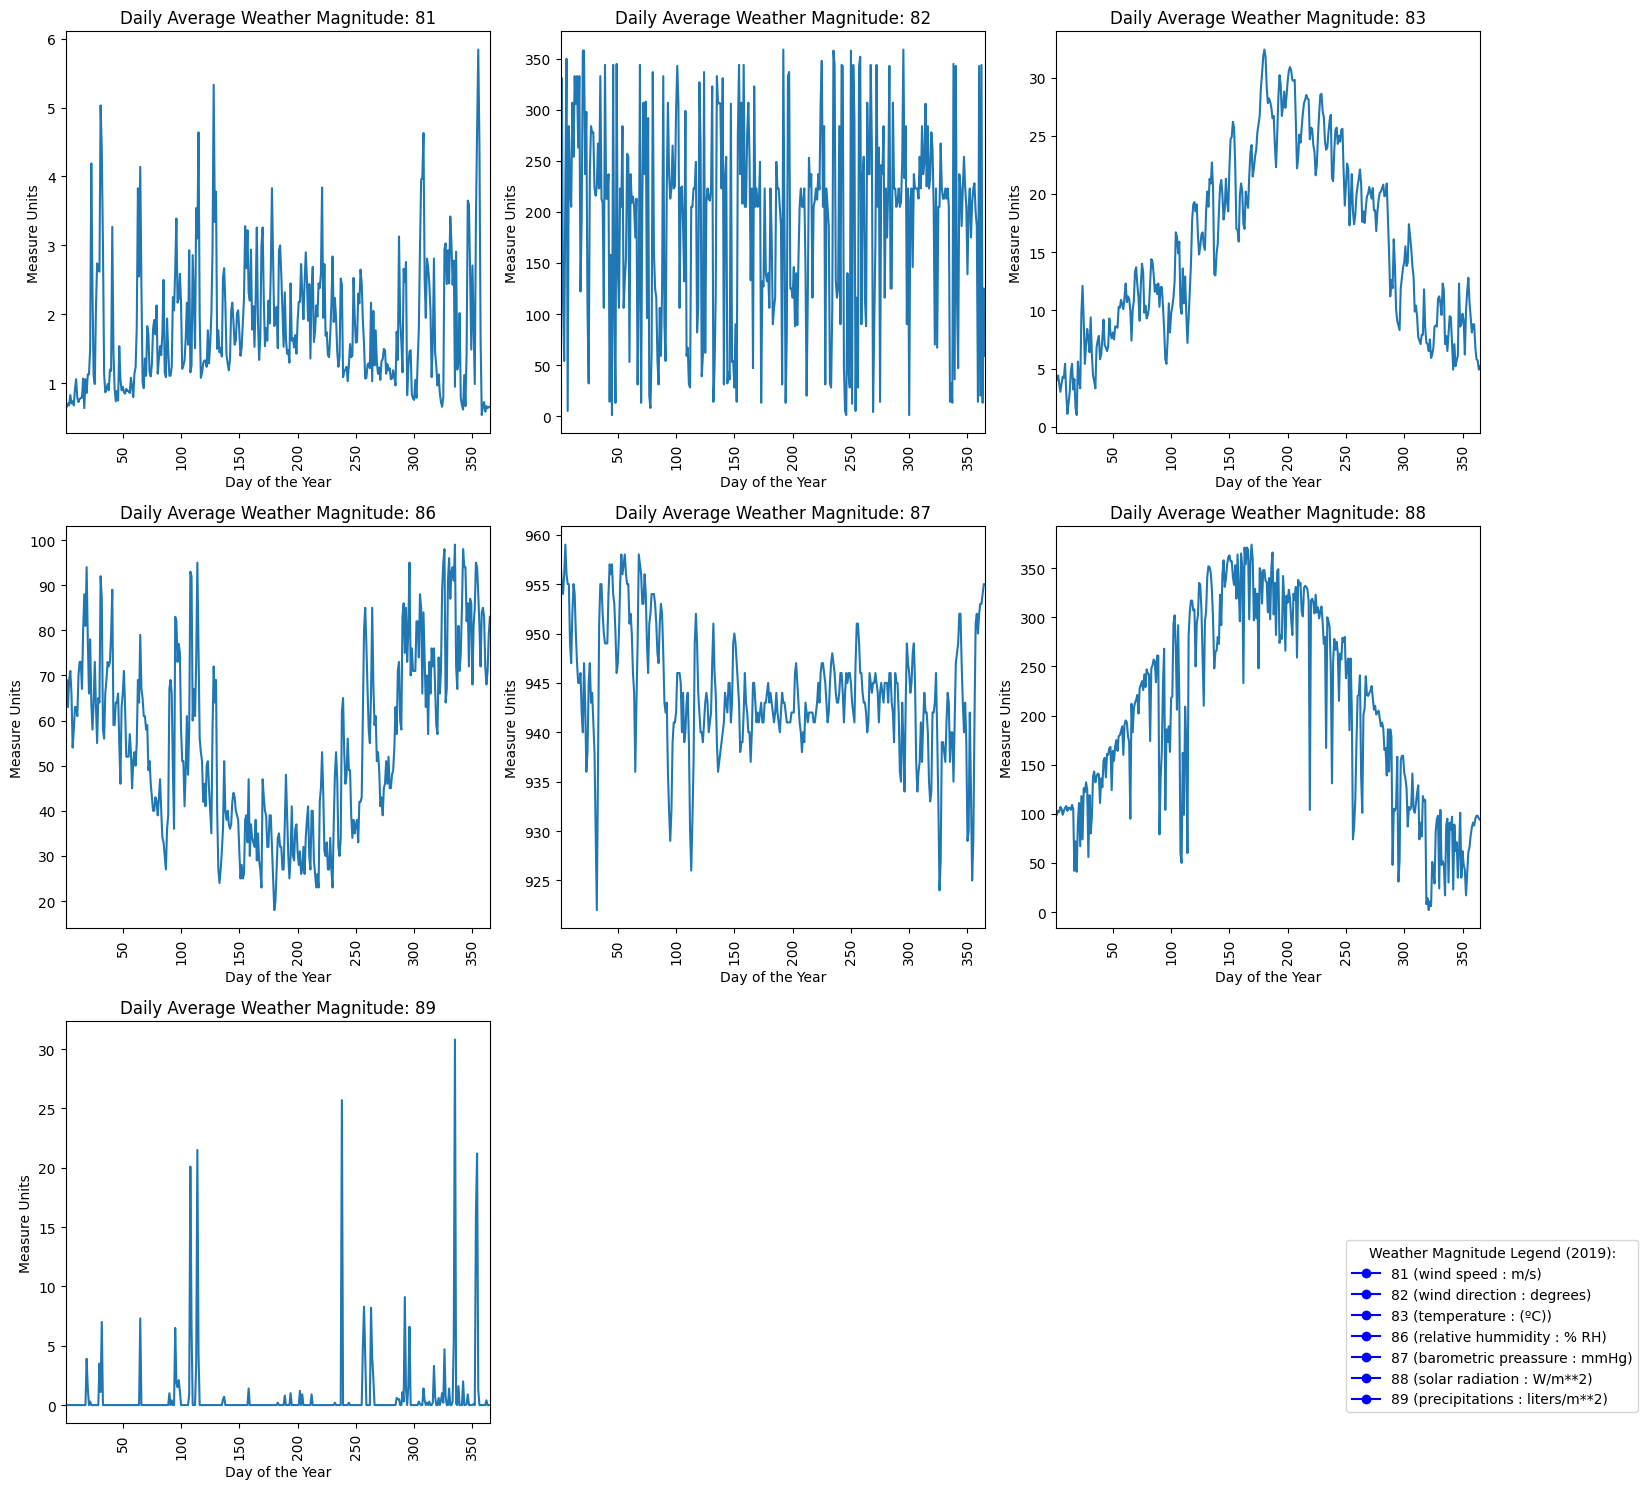

In [8]:
# Code inspired from following git repository: https://github.com/javi99/MT_predicting_BSD/blob/main/data/development/weather_merging_all_data.ipynb
magnitude_legend = {
    81: {"measure unit": "wind speed : m/s"},
    82: {"measure unit": "wind direction : degrees"},
    83: {"measure unit": "temperature : (ºC)"},
    86: {"measure unit": "relative hummidity : % RH"},
    87: {"measure unit": "barometric preassure : mmHg"},
    88: {"measure unit": "solar radiation : W/m**2"},
    89: {"measure unit": "precipitations : liters/m**2"},
}

# Determine the number of rows and columns for subplots
num_plots = len(weather_viz_df.columns) - 1  # Excluding the 'Numb. days in Year since Jan 1st' column
num_rows = (num_plots - 1) // 3 + 1
num_cols = min(num_plots, 3)

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Iterate over each variable and create a stacked line plot
for i, column in enumerate(weather_viz_df.columns[1:]):  # Skip the 'Numb. days in Year since Jan 1st' column
    ax = axes[i]
    sns.lineplot(data=weather_viz_df, x='Numb. days in Year since Jan 1st', y=column, ax=ax)
    
    # Set x-axis limits from 1 to 365 (days in 2019)
    ax.set_xlim(1, 365)

    # Rotate x-axis labels by 90 degrees
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

    # Add labels and title
    ax.set_xlabel('Day of the Year')
    ax.set_ylabel('Measure Units')
    ax.set_title(f'Daily Average Weather Magnitude: {column}')


# Hide any unused subplots
for i in range(num_plots, num_rows * num_cols):
    axes[i].axis('off')

# Add legend outside the last graph
handles = [plt.Line2D([0], [0], marker='o', color='blue', label=magnitude_legend[key]) for key in magnitude_legend]
labels = [f"{key} ({magnitude_legend[key]['measure unit']})" for key in magnitude_legend]
fig.legend(handles, labels, loc='lower right', bbox_to_anchor=(1.1, 0.05), title='Weather Magnitude Legend (2019):')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()
